### __Рейтинг университетов QS 2025__

__О наборе данных__

В этом наборе данных представлен рейтинг университетов мира QS 2025 года.

Он охватывает основные показатели и индикаторы, используемые для оценки академического совершенства, международного разнообразия, исследовательского воздействия и трудоустройства университетов по всему миру.

Каждая запись включает в себя рейтинг учреждения, название, местоположение, категорию размера, академические баллы и баллы репутации среди работодателей, соотношение профессорско-преподавательского состава и студентов, цитирование на факультет, долю иностранных преподавателей и студентов, присутствие в международных исследовательских сетях, результаты трудоустройства, показатели устойчивого развития и общий балл QS.

В совокупности эти показатели дают представление о глобальной ситуации в сфере высшего образования, облегчая сравнительный анализ и принятие обоснованных решений для различных заинтересованных сторон, включая студентов, преподавателей, политиков и работодателей.

 0 2025 Rank : Рейтинг QS 2025                       
 1 2024 Rank : Рейтинг QS 2024 г.                       II2 nstitution Name : Название университета               
 3 Location  : Код страны, в которой находится учреждение                      
 4 Location Full : Полное название страны, где находится учреждение         
 5 Size  : Размерная категория учреждения    
 6 Academic Reputation: Оценка, отражающая академический статус учебного заведения.             
 7 Employer Reputation : Оценка, показывающая, как работодатели воспринимают выпускников вуза.           
 8        : Соотношение преподавательского состава и студентов, служащее показателем качества преподавания        
 9 Citations per Faculty : Показатель влияния и качества исследования, указывающий количество цитирований, полученных на о          
 10 International Faculty : Процент иностранных преподавателей, что отражает разнообразие академического состава         
 11 International Students : Процент иностранных студентов, зачисленных в учебное заведение     
 12 International Research Network : Оценка, отражающая степень международного исследовательского сотр 
у ничества. 
 13 Employment Outcomes  : Оценка, указывающая на трудоустройство и карьерные перспективы выпускников          
 14 Sustainability : Оценка, устойчивого развития  
 15 QS Overall Score : Общий балл QS, присваиваемый университету на основе взвешенной комбинации
ной комбинации


In [94]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('qs-world-rankings-2025.csv')
df.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


In [96]:
df.shape

(1503, 16)

In [98]:
df.columns

Index(['2025 Rank', '2024 Rank', 'Institution Name', 'Location',
       'Location Full', 'Size', 'Academic Reputation', 'Employer Reputation',
       'Faculty Student', 'Citations per Faculty', 'International Faculty',
       'International Students', 'International Research Network',
       'Employment Outcomes', 'Sustainability', 'QS Overall Score'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   object 
 1   2024 Rank                       1482 non-null   object 
 2   Institution Name                1503 non-null   object 
 3   Location                        1503 non-null   object 
 4   Location Full                   1503 non-null   object 
 5   Size                            1503 non-null   object 
 6   Academic Reputation             1503 non-null   float64
 7   Employer Reputation             1503 non-null   float64
 8   Faculty Student                 1503 non-null   float64
 9   Citations per Faculty           1503 non-null   float64
 10  International Faculty           1403 non-null   float64
 11  International Students          1445 non-null   float64
 12  International Research Network  15

In [100]:
df.isnull().sum()

2025 Rank                           0
2024 Rank                          21
Institution Name                    0
Location                            0
Location Full                       0
Size                                0
Academic Reputation                 0
Employer Reputation                 0
Faculty Student                     0
Citations per Faculty               0
International Faculty             100
International Students             58
International Research Network      1
Employment Outcomes                 0
Sustainability                     19
QS Overall Score                    0
dtype: int64

<Axes: >

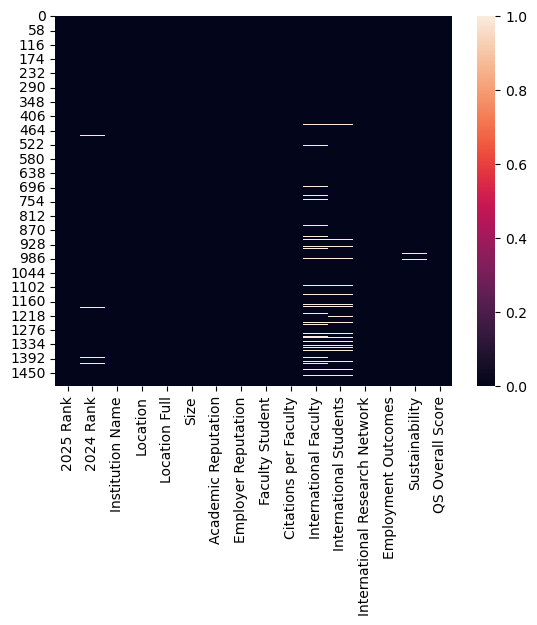

In [101]:
sns.heatmap(df.isnull())

In [102]:
#заменяет все значения в столбце 'QS Overall Score', равные '-', на 0.0 и  преобразуем тип данных столбца 'QS Overall Score' в тип данных float64 
df.loc[df['QS Overall Score']=='-',:] = 0.0
df['QS Overall Score'] = df['QS Overall Score'].astype('float64')



In [103]:
df['QS Overall Score']

0       100.0
1        98.5
2        96.9
3        96.8
4        96.7
        ...  
1498      0.0
1499      0.0
1500      0.0
1501      0.0
1502      0.0
Name: QS Overall Score, Length: 1503, dtype: float64

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Academic Reputation,1503.0,15.057485,24.963532,0.0,0.0,0.0,22.600,100.0
Employer Reputation,1503.0,14.770925,25.545527,0.0,0.0,0.0,20.200,100.0
Faculty Student,1503.0,15.452761,27.262702,0.0,0.0,0.0,18.100,100.0
Citations per Faculty,1503.0,17.787824,29.376731,0.0,0.0,0.0,28.550,100.0
International Faculty,1496.0,20.169652,33.957826,0.0,0.0,0.0,25.025,100.0
International Students,1501.0,16.719654,30.040114,0.0,0.0,0.0,19.000,100.0
International Research Network,1503.0,28.969395,38.340504,0.0,0.0,0.0,71.050,100.0
Employment Outcomes,1503.0,15.977179,27.653117,0.0,0.0,0.0,20.700,100.0
Sustainability,1503.0,19.953493,32.162059,0.0,0.0,0.0,32.700,100.0
QS Overall Score,1503.0,16.701663,23.694543,0.0,0.0,0.0,31.150,100.0


In [105]:
columns_with_missing_values = ['2024 Rank',
                               'International Faculty',
                               'International Students', 
                               'International Research Network', 
                               'Sustainability']

In [106]:
# Преобразуем столбцы в числовые значения, приведя ошибки к NaN 
for column in columns_with_missing_values:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column].fillna(df[column].mean(), inplace=True)

df.isnull().sum()

2025 Rank                         0
2024 Rank                         0
Institution Name                  0
Location                          0
Location Full                     0
Size                              0
Academic Reputation               0
Employer Reputation               0
Faculty Student                   0
Citations per Faculty             0
International Faculty             0
International Students            0
International Research Network    0
Employment Outcomes               0
Sustainability                    0
QS Overall Score                  0
dtype: int64

__Все пропущенные значения успешно обработаны. Набор данных больше не содержит пропущенных значени__.

In [107]:
df=df.fillna(0)


In [108]:
df.duplicated().sum()

902

In [109]:
df["Institution Name"].unique()

array(['Massachusetts Institute of Technology (MIT) ',
       'Imperial College London', 'University of Oxford',
       'Harvard University', 'University of Cambridge',
       'Stanford University',
       'ETH Zurich - Swiss Federal Institute of Technology',
       'National University of Singapore (NUS)', 'UCL',
       'California Institute of Technology (Caltech)',
       'University of Pennsylvania',
       'University of California, Berkeley (UCB)',
       'The University of Melbourne', 'Peking University',
       'Nanyang Technological University, Singapore (NTU)',
       'Cornell University', 'The University of Hong Kong',
       'The University of Sydney',
       'The University of New South Wales (UNSW Sydney)',
       'Tsinghua University', 'University of Chicago',
       'Princeton University', 'Yale University', 'Université PSL',
       'University of Toronto', 'EPFL', 'The University of Edinburgh',
       'Technical University of Munich', 'McGill University',
       'The A

In [110]:
df["Institution Name"].nunique()

601

In [111]:
df["Location Full"].unique()

array(['United States', 'United Kingdom', 'Switzerland', 'Singapore',
       'Australia', 'China (Mainland)', 'Hong Kong SAR', 'France',
       'Canada', 'Germany', 'South Korea', 'Japan', 'Netherlands',
       'Malaysia', 'Belgium', 'New Zealand', 'Taiwan', 'Argentina',
       'Sweden', 'Ireland', 'Brazil', 'Chile', 'Russia', 'Mexico',
       'Denmark', 'Saudi Arabia', 'Italy', 'Finland', 'India', 'Norway',
       'Qatar', 'Austria', 'Kazakhstan', 'Spain', 'South Africa',
       'Colombia', 'United Arab Emirates', 'Indonesia', 'Israel',
       'Thailand', 'Macau SAR', 'Czech Republic', 'Lebanon', 'Poland',
       'Portugal', 'Turkey', 'Pakistan', 'Greece', 0.0, 'Philippines',
       'Iran, Islamic Republic of', 'Egypt', 'Luxembourg', 'Estonia',
       'Peru', 'Oman', 'Jordan', 'Brunei', 'Belarus', 'Cyprus',
       'Lithuania', 'Vietnam', 'Costa Rica', 'Bahrain', 'Uzbekistan',
       'Iceland', 'Bangladesh', 'Hungary', 'Slovenia'], dtype=object)

In [112]:
df["Location Full"].nunique()

69

In [113]:
df["Size"].unique()

array(['M', 'L', 'XL', 'S', 0.0], dtype=object)

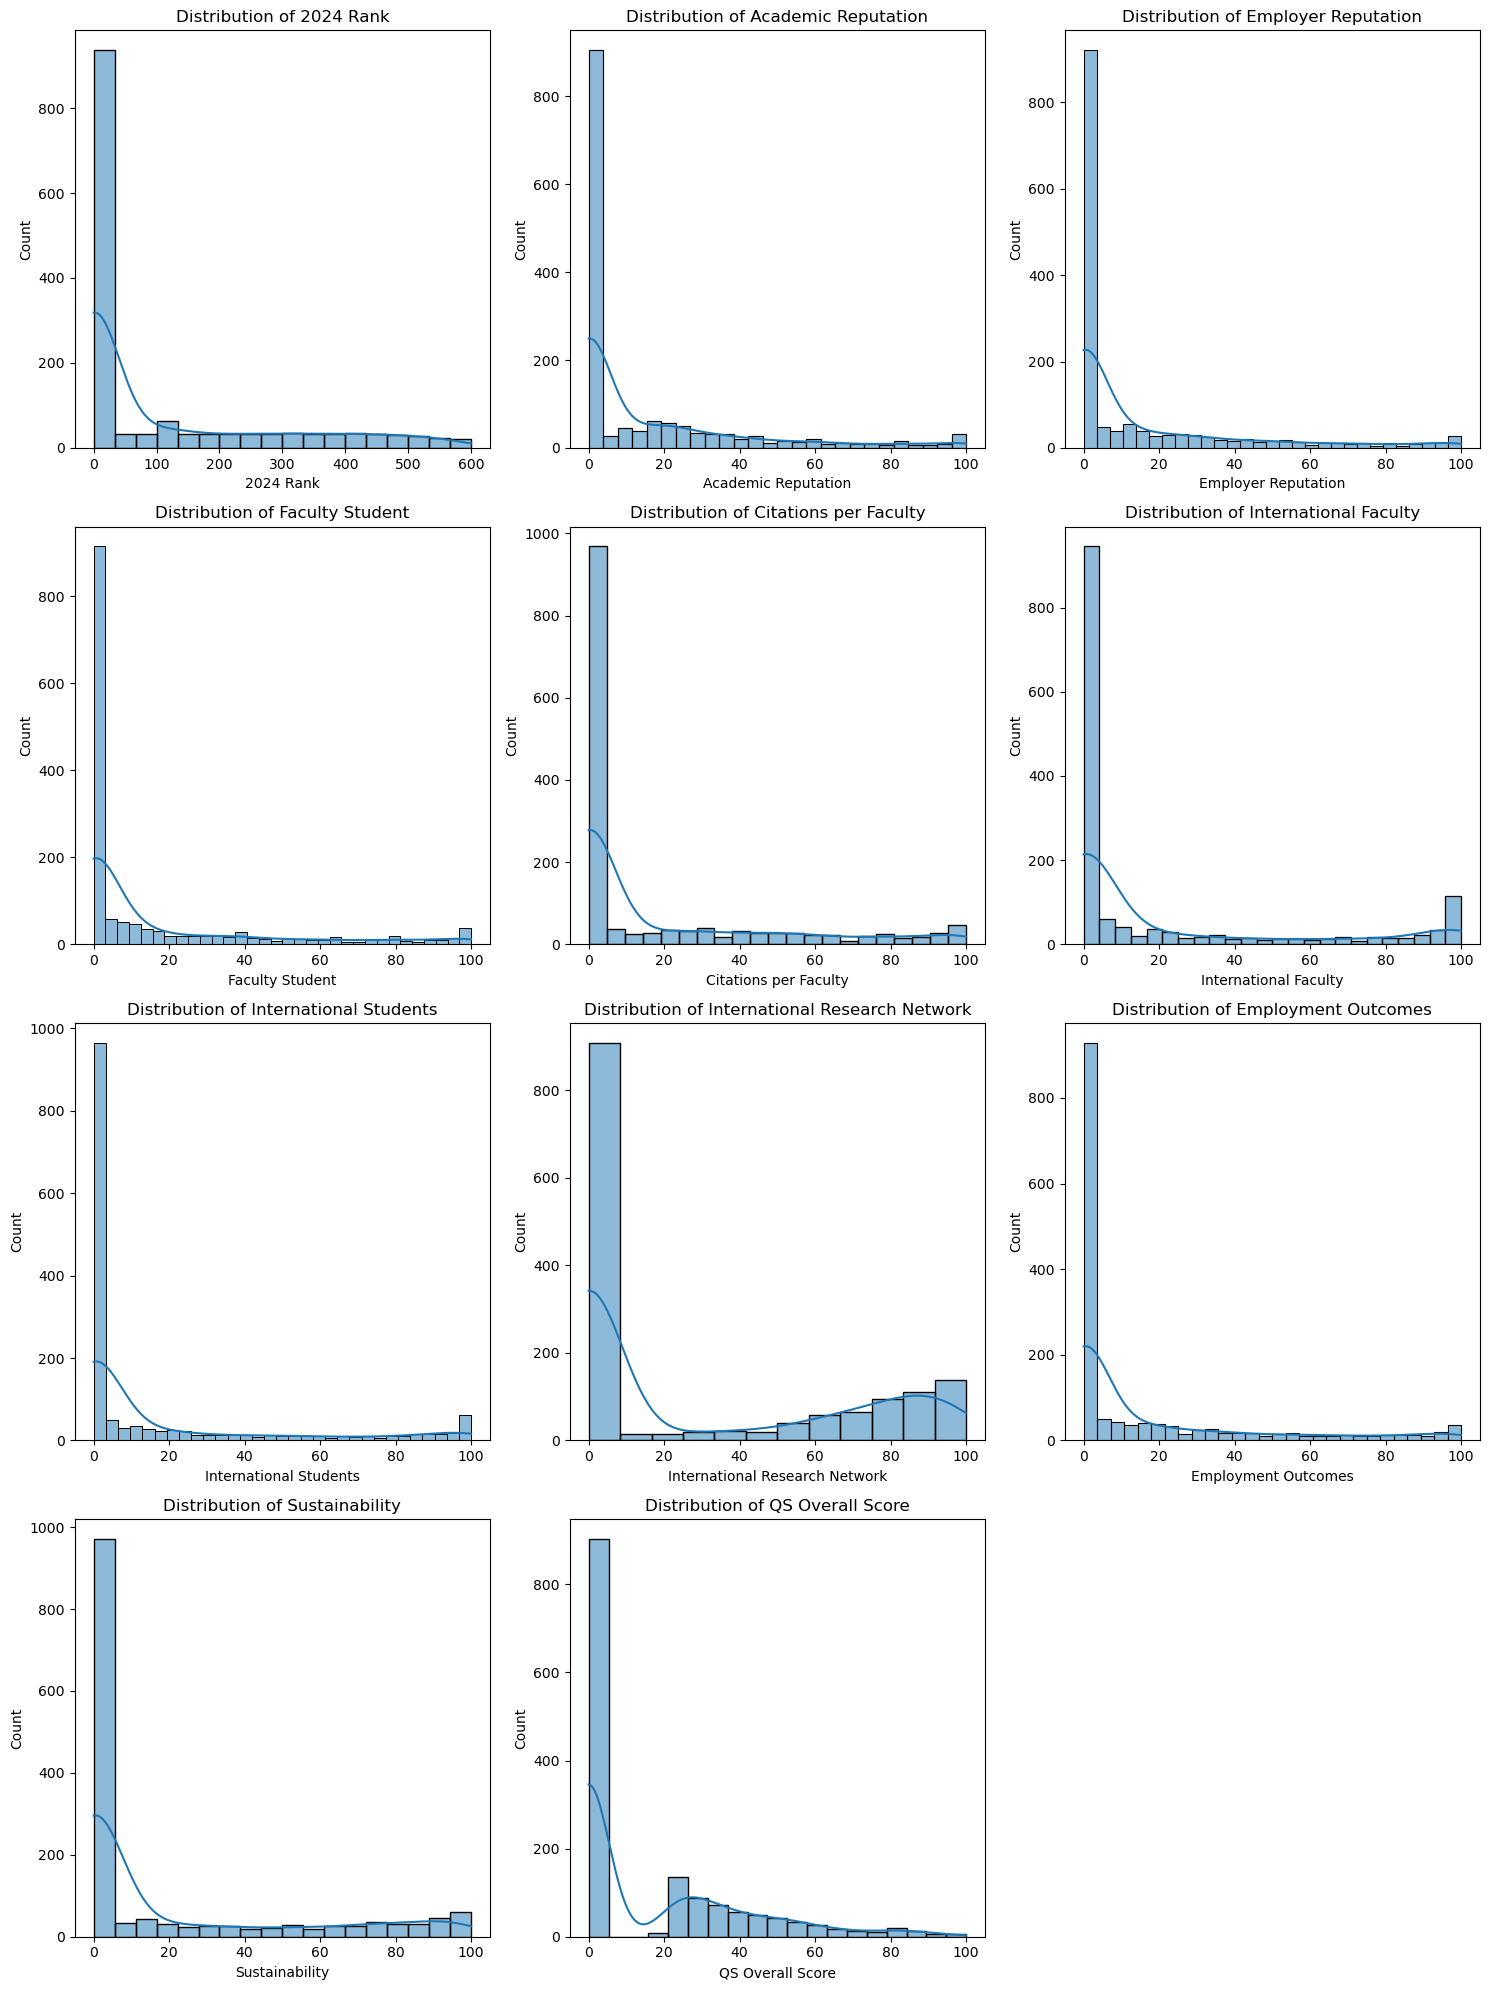

In [114]:
#визуализация распределения числовых данных в DataFrame
numerical_cols = df.select_dtypes(
    include=['float64', 'int64']).columns
n_cols = len(numerical_cols)

nrows = int(np.ceil(n_cols / 3))

fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=3, 
    figsize=(15, 5 * nrows))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        df,
        x=col,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

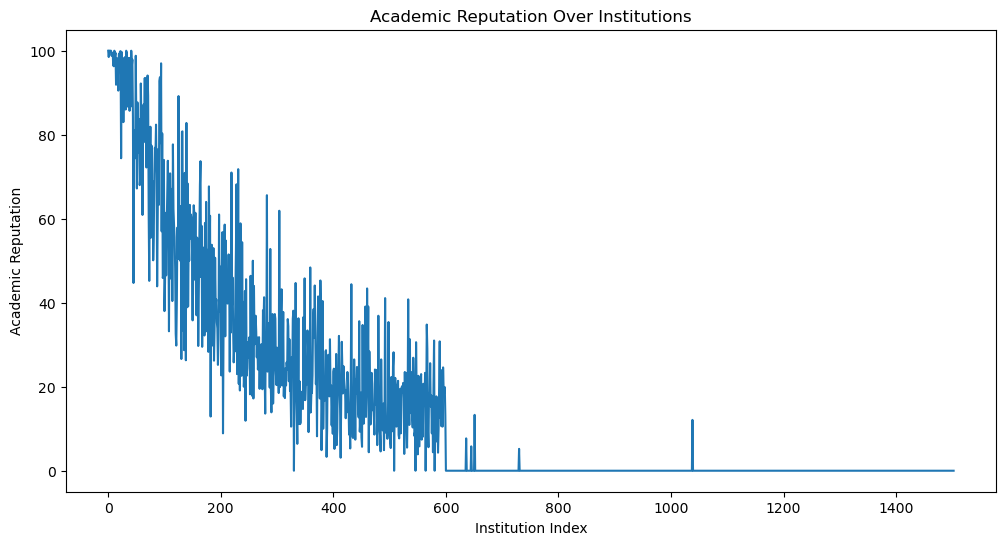

In [136]:
#создадим линейный график для столбца «Академическая репутация» в наборе данных.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="Academic Reputation")
plt.title("Academic Reputation Over Institutions")
plt.xlabel("Institution Index")
plt.ylabel("Academic Reputation")
plt.show()

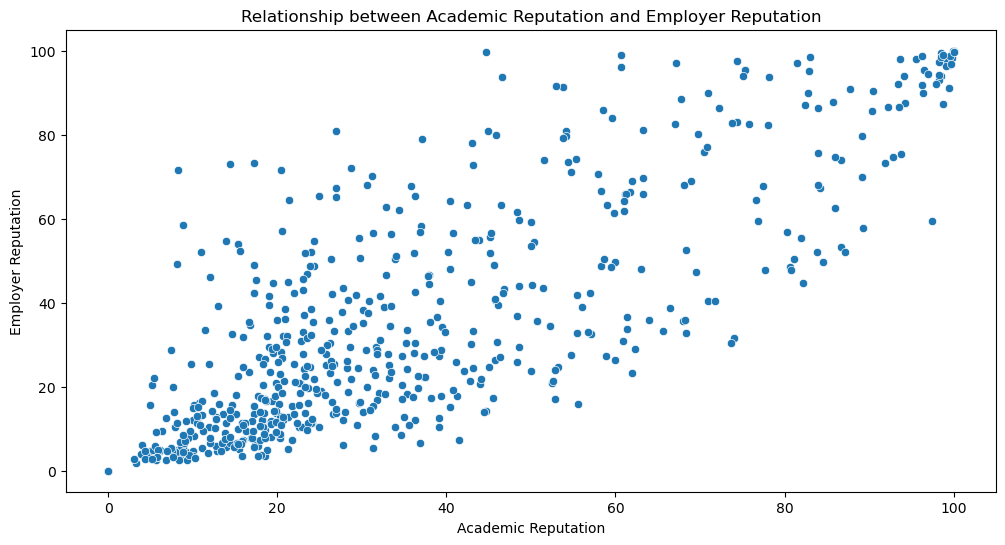

In [116]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Academic Reputation", y="Employer Reputation")
plt.title("Relationship between Academic Reputation and Employer Reputation")
plt.xlabel("Academic Reputation")
plt.ylabel("Employer Reputation")
plt.show()

__Вывод.__
Чем выше статус учебного заведения, тем лучше работадатель воспринимает выпускника вуза.   

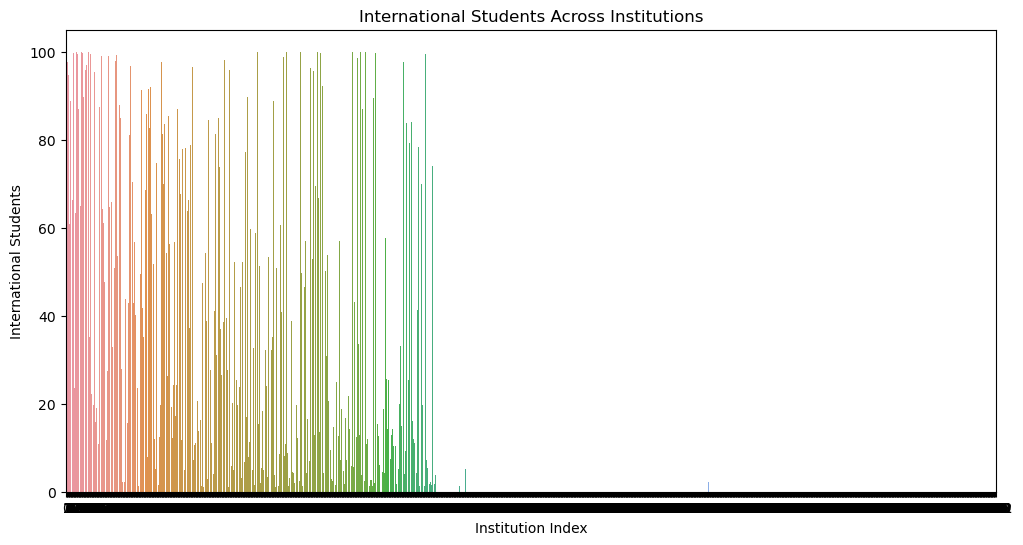

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x=df.index, y="International Students")
plt.title("International Students Across Institutions")
plt.xlabel("Institution Index")
plt.ylabel("International Students")
plt.show()

In [118]:
#Лучшие университеты на основе «Общего балла QS».
# Отсортируем фрейм данных по «Общему баллу QS» в порядке убывания и отобразите 10 лучших университетов.

top_universities = df.sort_values(by='QS Overall Score', ascending=False).head(10)
top_universities[['Institution Name', 'Location', 'QS Overall Score']]

,Institution Name,Location,QS Overall Score
0,Massachusetts Institute of Technology (MIT),US,100.0
1,Imperial College London,UK,98.5
2,University of Oxford,UK,96.9
3,Harvard University,US,96.8
4,University of Cambridge,UK,96.7
5,Stanford University,US,96.1
6,ETH Zurich - Swiss Federal Institute of Techno...,CH,93.9
7,National University of Singapore (NUS),SG,93.7
8,UCL,UK,91.6
9,California Institute of Technology (Caltech),US,90.9


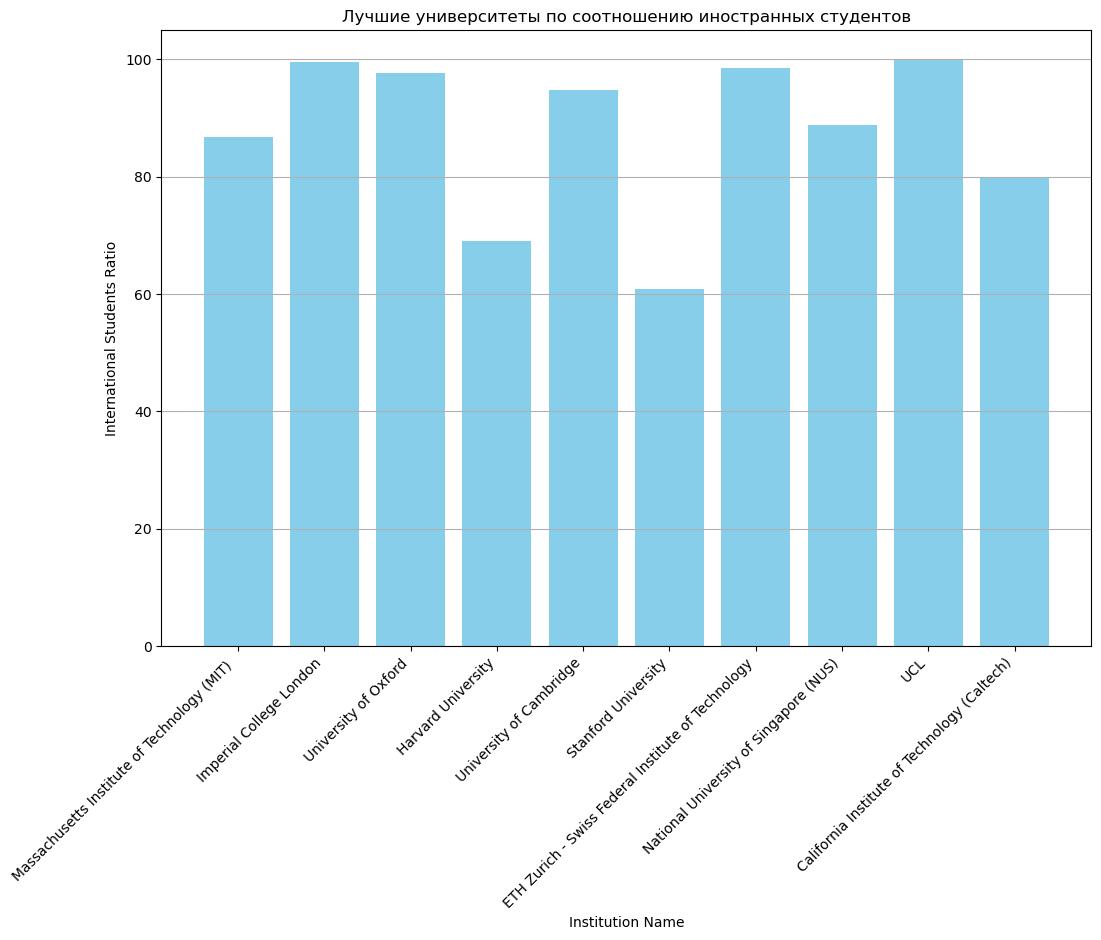

In [89]:
#Создадим гистограмму для сравнения лучших университетов по их «коэффициенту иностранных студентов».
plt.figure(figsize=(12, 8))
plt.bar(top_universities['Institution Name'], top_universities['International Students'], color='skyblue')
plt.title('Лучшие университеты по соотношению иностранных студентов')
plt.xlabel('Institution Name')
plt.ylabel('International Students Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [119]:
#Проведем статистический анализ, чтобы сравнить значения «Академическая репутация» в различных категориях «Местоположение» в наборе данных.

# Воспользуемся методом describe(), чтобы получить сводную статистику «Академической репутации», сгруппированную по «Местоположению».
df_grouped = df.groupby('Location')['Academic Reputation'].describe()
df_grouped

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
0.0,903.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.0
AE,9.0,19.144444,6.848013,4.6,17.300,20.10,22.600,30.1
AR,4.0,43.925000,34.807315,19.9,20.650,30.85,54.125,94.1
AT,5.0,30.520000,24.034808,12.8,14.700,20.30,33.900,70.9
AU,31.0,37.200000,30.709152,4.3,14.100,28.30,49.700,98.5
...,...,...,...,...,...,...,...,...
UK,56.0,40.564286,29.475712,8.1,15.475,31.45,59.975,100.0
US,84.0,48.761905,31.728703,3.1,20.250,37.85,78.750,100.0
UZ,1.0,30.600000,NaN,30.6,30.600,30.60,30.600,30.6


In [120]:
#Удаление нечисловых столбцов для расчета корреляционной матрицы
numeric_df = df.select_dtypes(include=['float64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,2024 Rank,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
2024 Rank,1.000000,0.278605,0.293071,0.456618,0.423521,0.445569,0.389152,0.628897,0.321239,0.400690,0.430566
Academic Reputation,0.278605,1.000000,0.905882,0.643668,0.641050,0.605206,0.609574,0.804818,0.829563,0.795483,0.944424
Employer Reputation,0.293071,0.905882,1.000000,0.630338,0.566696,0.552012,0.581435,0.705518,0.798648,0.714057,0.888613
Faculty Student,0.456618,0.643668,0.630338,1.000000,0.454143,0.536294,0.556546,0.626176,0.581144,0.522504,0.721636
Citations per Faculty,0.423521,0.641050,0.566696,0.454143,1.000000,0.615701,0.556031,0.740717,0.547709,0.613058,0.802599
International Faculty,0.445569,0.605206,0.552012,0.536294,0.615701,1.000000,0.828592,0.721573,0.588132,0.702922,0.754228
International Students,0.389152,0.609574,0.581435,0.556546,0.556031,0.828592,1.000000,0.678705,0.556469,0.664559,0.739794
International Research Network,0.628897,0.804818,0.705518,0.626176,0.740717,0.721573,0.678705,1.000000,0.740312,0.843654,0.891787
Employment Outcomes,0.321239,0.829563,0.798648,0.581144,0.547709,0.588132,0.556469,0.740312,1.000000,0.720464,0.836237
Sustainability,0.400690,0.795483,0.714057,0.522504,0.613058,0.702922,0.664559,0.843654,0.720464,1.000000,0.845836


In [124]:
!pip install sklearn.preprocessing

Defaulting to user installation because normal site-packages is not writeable


In [127]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 653.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.2/11.0 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.0 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.0 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.0 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.0 MB 2.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.0 MB 3.4 MB/s eta 0:00:03
   ------ 

In [131]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Определим категориальные и числовые столбцы
categorical_cols = ['2025 Rank','Institution Name', 'Location', 'Location Full', 'Size']
numerical_cols = df.select_dtypes(include=['float64']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the transformations
df_processed = preprocessor.fit_transform(df)
df_processed

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [132]:
# Convert the "QS Overall Score" column to numeric, forcing errors to NaN
df['QS Overall Score'] = pd.to_numeric(df['QS Overall Score'], errors='coerce')

# Create a binary target variable for classification
# Let's assume we want to classify universities into two categories based on their QS Overall Score:
# 1. Top universities (QS Overall Score >= 90)
# 2. Other universities (QS Overall Score < 90)

df['Top University'] = (df['QS Overall Score'] >= 90).astype(int)

# Display the first few rows to verify the new column
df[['Institution Name', 'QS Overall Score', 'Top University']].head()

,Institution Name,QS Overall Score,Top University
0,Massachusetts Institute of Technology (MIT),100.0,1
1,Imperial College London,98.5,1
2,University of Oxford,96.9,1
3,Harvard University,96.8,1
4,University of Cambridge,96.7,1


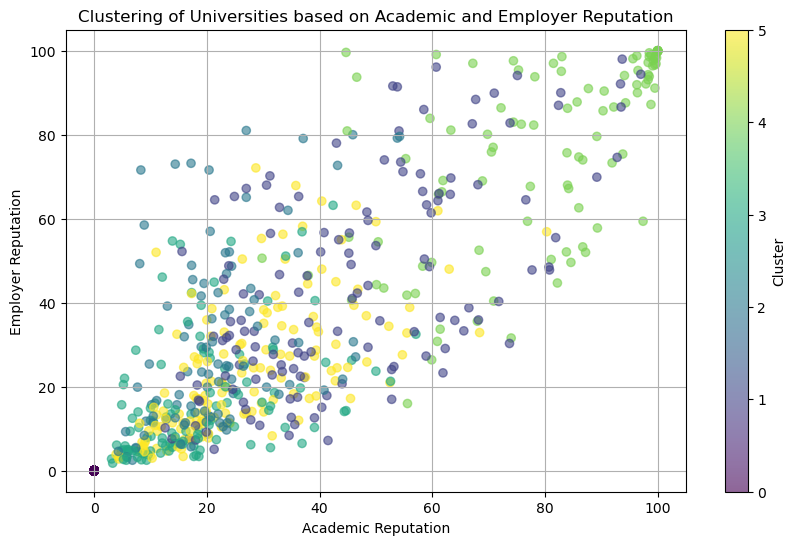

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score,Top University,Cluster
0,1,1.0,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100.0,1,4
1,2,6.0,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5,1,4
2,3,3.0,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9,1,4
3,4,4.0,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8,1,4
4,5,2.0,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7,1,4


In [134]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the numerical columns for clustering
numerical_cols = ['Academic Reputation', 'Employer Reputation', 'Faculty Student', 'Citations per Faculty', 
                  'International Faculty', 'International Students', 'International Research Network', 
                  'Employment Outcomes', 'Sustainability']

# Extract the numerical data for clustering
X_clustering = df[numerical_cols]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

# Add the cluster labels to the dataframe
df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Academic Reputation'], df['Employer Reputation'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clustering of Universities based on Academic and Employer Reputation')
plt.xlabel('Academic Reputation')
plt.ylabel('Employer Reputation')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


# Display the first few rows of the dataframe with the cluster labels
df.head()

In [138]:
matrix=df.corr(method='pearson')
plt.figure(figsize=(6,6))
sns.heatmap(matrix,annot=True,cmap='coolwarm')

ValueError: could not convert string to float: 'Massachusetts Institute of Technology (MIT) '